<a href="https://colab.research.google.com/github/Shiladitya56/Algorithm-Analysis/blob/main/SEM2/sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get Set Sort!!!


In [307]:
import random
from typing import List
import time
import matplotlib.pyplot as pt
import pandas as pd

In [308]:
class Sort(object):
  arr = []
  def __init__(shila, arr:List):
    shila.arr = arr
  def sort():
    raise NotImplementedError()

In [309]:
class Bubble(Sort):
  et = 0
  def __init__(shila, arr:List):
    super().__init__(arr)
  def sort(shila)->None:
    st = time.time()
    for i in range(len(shila.arr)):
      swapped = False
      for j in range(0, len(shila.arr) - i - 1):
        if shila.arr[j] > shila.arr[j + 1]:
          temp = shila.arr[j]
          shila.arr[j] = shila.arr[j+1]
          shila.arr[j+1] = temp
          swapped = True
      if not swapped:
        break
    shila.et = time.time() - st
class Merge(Sort):
  et = 0
  def __init__(shila, arr:List):
    super().__init__(arr)
  def sort(shila):
    st = time.time()
    w = 1
    n = len(shila.arr)
    while w < n:
      l = 0
      while l < n:
        r = min(l+(w*2-1), n-1)
        m = min(l+w-1,n-1)
        shila.merge(l, m, r)
        l += w* 2
      w *= 2
    shila.et = time.time() - st
  def merge(shila, l, m, r):
    n1 = m - l + 1
    n2 = r - m
    L = [0] * n1
    R = [0] * n2
    for i in range(0, n1):
      L[i] = shila.arr[l + i]
    for i in range(0, n2):
      R[i] = shila.arr[m + i + 1]
    i, j, k = 0, 0, l
    while i < n1 and j < n2:
      if L[i] <= R[j]:
        shila.arr[k] = L[i]
        i += 1
      else:
        shila.arr[k] = R[j]
        j += 1
      k += 1
    while i < n1:
      shila.arr[k] = L[i]
      i += 1
      k += 1
    while j < n2:
      shila.arr[k] = R[j]
      j += 1
      k += 1
class Insertion(Sort):
  et = 0
  def __init__(shila, arr:List):
    super().__init__(arr)
  def sort(shila):
    st = time.time()
    for i in range(1, len(shila.arr)):
      k = shila.arr[i]
      j = i - 1
      while j >= 0 and k < shila.arr[j]:
        shila.arr[j + 1] = shila.arr[j]
        j = j - 1
      shila.arr[j + 1] = k
    shila.et = time.time()-st
class Selection(Sort):
  et = 0
  def __init__(shila, arr:List):
    super().__init__(arr)
  def sort(shila):
    st = time.time()
    for i in range(len(shila.arr)):
      min = i
      for j in range(i+1, len(shila.arr)):
        if shila.arr[j] < shila.arr[min]:
          min = j
      (shila.arr[i], shila.arr[min]) = (shila.arr[min], shila.arr[i])
    shila.et = time.time()-st

In [310]:
class Complex(object):
  bubble = []
  merge = []
  insertion = []
  selection = []
  def __init__(shila):
    pass
  def timcom(shila, start:int=100, end:int=1100, step:int=100):
    '''
      This function returns in order -
      merge.. bubble.. insertion.. selection. (deprecated).
      None.
      Accepts number of random numbers to generate as input as -
      where to start from?
      when to end?
      how to step?
    '''
    shila.s = start
    shila.e = end
    shila.st = step
    for i in range(start,end,step):
      shila.r1 = []
      for j in range(i):
        shila.r1.append(random.randint(1,999999999))
      shila.r2 = shila.r1[:]
      shila.merge.append(shila.mertim())
      shila.bubble.append(shila.bubtim())
      shila.insertion.append(shila.intim())
      shila.selection.append(shila.setim())
    return None
  def mertim(shila):
    o = Merge(shila.r1)
    o.sort()
    shila.r1 = shila.r2
    return o.et
  def bubtim(shila):
    o = Bubble(shila.r1)
    o.sort()
    shila.r1 = shila.r2
    return o.et
  def intim(shila):
    o = Insertion(shila.r1)
    o.sort()
    shila.r1 = shila.r2
    return o.et
  def setim(shila):
    o = Selection(shila.r1)
    o.sort()
    shila.r1 = shila.r2
    return o.et
  def plot(shila):
    '''
      To visualize the time complexities.
    '''
    r = range(shila.s,shila.e,shila.st)
    pt.plot(r, shila.merge)
    pt.plot(r, shila.bubble)
    pt.plot(r, shila.insertion)
    pt.plot(r, shila.selection)
    pt.legend(['merge', 'bubble', 'insertion','selection'])
    pt.xlabel('number of inputs')
    pt.ylabel('time taken in seconds')
    pt.title('Time Complexity');
  def timtable(shila)->pd.DataFrame:
    mer = shila.merge[:]
    bub = shila.bubble[:]
    ins = shila.insertion[:]
    sel = shila.selection[:]
    df = pd.DataFrame()
    for i in range(shila.e-shila.st, shila.s-shila.st, -shila.st):
      tdf = pd.DataFrame([['Merge, Bubble, Insertion, Selection',i,\
                           ("{:.4f}".format(mer.pop()),"{:.4f}".\
                            format(bub.pop()), "{:.4f}".format(ins.pop())\
                            , "{:.4f}".format(sel.pop()))]],\
                          columns=['Sorting Algorithm used',\
                                   'Number of Inputs passed',\
                                   'Time Taken in seconds...'])
      df = pd.concat([df,tdf], ignore_index=True)
    return df

In [311]:
tim = Complex()
tim.timcom()

In [312]:
tim.timtable().head()

,Sorting Algorithm used,Number of Inputs passed,Time Taken in seconds...
0,"Merge, Bubble, Insertion, Selection",1000,"(0.0053, 0.1603, 0.0003, 0.0649)"
1,"Merge, Bubble, Insertion, Selection",900,"(0.0047, 0.1099, 0.0003, 0.0521)"
2,"Merge, Bubble, Insertion, Selection",800,"(0.0043, 0.0870, 0.0002, 0.0430)"
3,"Merge, Bubble, Insertion, Selection",700,"(0.0036, 0.0688, 0.0002, 0.0343)"
4,"Merge, Bubble, Insertion, Selection",600,"(0.0031, 0.0478, 0.0002, 0.0231)"


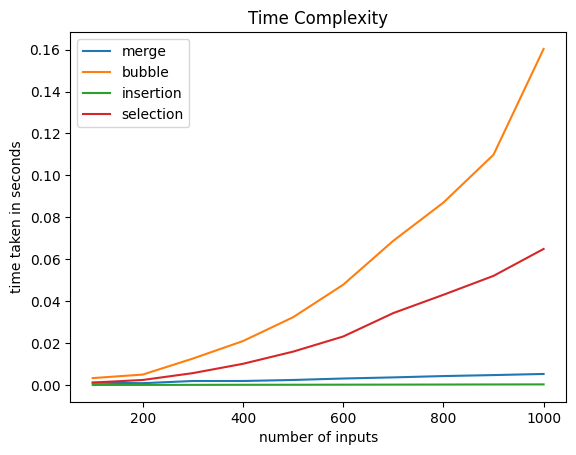

In [313]:
tim.plot()